#### PGE 382 - Numerical Methods in Petroleum and Geosystems Engineering
#### Renato Poli - rep2656

#### CP5 - Mar, 7th

### a) Case 1

In [1]:
from math import factorial, pi, sin, ceil
import numpy as np
np.set_printoptions(threshold=80, linewidth=80)

from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')

B = np.diag(5*[-8]) + np.diag(4*[1],-1) + np.diag(4*[1],1)
B[0,1] = 2
I = np.eye( 5 )
Z = np.zeros( [5,5])

A = np.block( [ [ B-3/2*I, 6*I, Z, Z, Z ],
                [ 3*I , B, 3*I, Z, Z ],
                [ Z, 3*I , B, 3*I, Z ],
                [ Z, Z, 3*I , B, 3*I ],
                [ Z, Z, Z, 6*I , B ] ] )

b = -np.ones( 25 )

L = np.eye( 25 )
U = np.zeros( [ 25, 25 ] )
for i in range(25):
    for j in range(i,25):
        U[i,j] = A[i,j]
        for k in range( i ) :
            U[i,j] -= L[i,k] * U[k,j]

    for j in range(i+1,25):
        #print(f"i,j:{i},{j}")
        acc = 0
        for k in range( i ) :
            acc +=  L[j,k] * U[k,i]
        L[j,i] = ( A[j,i] - acc ) / U[i,i]

# Ly=b
y = np.zeros(25)
for i in range(25):
    y[i] = b[i]
    for k in range( i ) :
        y[i] -= L[i,k] * y[k]

# Ux=y
x = np.zeros(25)
for i in reversed(range(25)):
    acc = 0
    for k in range( i+1, 25 ) :
        acc += U[i,k] * x[k]
    x[i] = ( y[i] - acc ) / U[i,i]

print(f"L={L}")
print(f"\nU={U}")
print(f"\ny={y}")
print(f"\nx={x}")

n = np.linalg.norm( A@x-b )
print(f"\n\nx holds the solution for the Ax=b problem. \nHence, the norm of Ax-b is near zero: ({n:.5e})")


L=[[ 1.          0.          0.         ...  0.          0.          0.        ]
 [-0.10526316  1.          0.         ...  0.          0.          0.        ]
 [-0.         -0.10764873  1.         ...  0.          0.          0.        ]
 ...
 [-0.         -0.         -0.         ...  1.          0.          0.        ]
 [-0.         -0.         -0.         ... -0.50222105  1.          0.        ]
 [-0.         -0.         -0.         ... -0.06644296 -0.44809461  1.        ]]

U=[[-9.5         2.          0.         ...  0.          0.          0.        ]
 [ 0.         -9.28947368  1.         ...  0.          0.          0.        ]
 [ 0.          0.         -9.39235127 ...  0.          0.          0.        ]
 ...
 [ 0.          0.          0.         ... -3.76126527  1.88898661  0.24990961]
 [ 0.          0.          0.         ...  0.         -3.94619127  1.76826703]
 [ 0.          0.          0.         ...  0.          0.         -4.30409793]]

y=[ -1.          -1.10526316  -1.1

\newpage
### b) Case 2

In [2]:
from math import factorial, pi, sin, ceil
import numpy as np
np.set_printoptions(threshold=100000, linewidth=100000)

from numpy import exp, linspace, vectorize
import matplotlib.pyplot as plt

plt.style.use('paper.mplstyle')
# Index
def _( i, j ) :
    global nx
    return j * nx + i
# EXACT SOLUTION
def exact( x, y, t ) :
    global alpha  
    return alpha * np.exp(-t)*(x**2+y**2)+1

tf = 0.2
dx = 1/20
alpha = 1
dt = 1/100

T = np.arange(0, tf + dt, dt)

# Indexing from -2 to N+2
nx = int(1/dx+5)
nt = len(T)
# Dimension of the full vectors and matrices
N = nx**2

# Assuming X=Y
X=np.zeros( nx )
for i in range(0,nx) : X[i] = dx * i

# MAPS OF UNKNOWNS - remove 3 unkwons from each side
UKN1 = np.zeros( N )
for i in range(2,nx-2) : 
    for j in range(2,nx-2) :
        UKN1[_(i,j)] = 1
KN1 = ( UKN1 == 0 )
UKN1 = ( UKN1 == 1 )



# Feed exact solution
EXACTnk = np.zeros( [ nt, N ] )
for n in range(0,nt) :
    t = dt * n
    EXACTnk[n,:] = np.zeros( N )
    for i in range(0,nx) :
        for j in range(0,nx) :
            k = _(i,j)
            EXACTnk[n,k] = exact(X[i],X[j],t)

Unk = np.zeros( [ nt, N ] )
Unk[ 0, : ] = EXACTnk[0,:]
Unk[ :, KN1 ] = EXACTnk[ :, KN1 ]
for n in range(1,nt) :
    t = dt * n
    U = Unk[n-1,:] 

    K = np.zeros([N,N])
    B = np.zeros( N )
    for i in range(2,nx-2) :
        for j in range(2,nx-2) :
            k   = _(i,j)
            
            # Diag
            K[k,k] += 1/dt
            B[k] += 1/dt * U[k]
            
            # X
            k1p = _(i+1,j)
            k2p = _(i+2,j)
            k1n = _(i-1,j)
            k2n = _(i-2,j)
            
            K[k,k2n] += (-alpha/2) * 1/12/dx/dx * ( -1 )
            K[k,k1n] += (-alpha/2) * 1/12/dx/dx * ( 16 )
            K[k,k]   += (-alpha/2) * 1/12/dx/dx * ( -30 )
            K[k,k1p] += (-alpha/2) * 1/12/dx/dx * ( 16 )
            K[k,k2p] += (-alpha/2) * 1/12/dx/dx * ( -1 )
            
            B[k] += (alpha/2) * 1/12/dx/dx * ( -1 )  * U[k2n]
            B[k] += (alpha/2) * 1/12/dx/dx * ( 16 )  * U[k1n]
            B[k] += (alpha/2) * 1/12/dx/dx * ( -30 ) * U[k]
            B[k] += (alpha/2) * 1/12/dx/dx * ( 16 )  * U[k1p]
            B[k] += (alpha/2) * 1/12/dx/dx * ( -1 )  * U[k2p]

            # Y
            k1p = _(i,j+1)
            k2p = _(i,j+2)
            k1n = _(i,j-1)
            k2n = _(i,j-2)
            
            K[k,k2n] += (-alpha/2) * 1/12/dx/dx * ( -1 )
            K[k,k1n] += (-alpha/2) * 1/12/dx/dx * ( 16 )
            K[k,k]   += (-alpha/2) * 1/12/dx/dx * ( -30 )
            K[k,k1p] += (-alpha/2) * 1/12/dx/dx * ( 16 )
            K[k,k2p] += (-alpha/2) * 1/12/dx/dx * ( -1 )
            
            B[k] += (alpha/2) * 1/12/dx/dx * ( -1 )  * U[k2n]
            B[k] += (alpha/2) * 1/12/dx/dx * ( 16 )  * U[k1n]
            B[k] += (alpha/2) * 1/12/dx/dx * ( -30 ) * U[k]
            B[k] += (alpha/2) * 1/12/dx/dx * ( 16 )  * U[k1p]
            B[k] += (alpha/2) * 1/12/dx/dx * ( -1 )  * U[k2p]

            # CONSTANTS
            x = X[i]
            y = X[j]
            
            B[k] += - np.exp(-t) * ( 4 * alpha + x**2 + y**2 )

    Kk = K[np.ix_(UKN1,KN1)]
    Ku = K[np.ix_(UKN1,UKN1)]
    Bu = B[UKN1] - Kk @ Unk[ n, KN1 ]
    Uu = np.linalg.solve( Ku, Bu )
    Unk[n,UKN1] = Uu

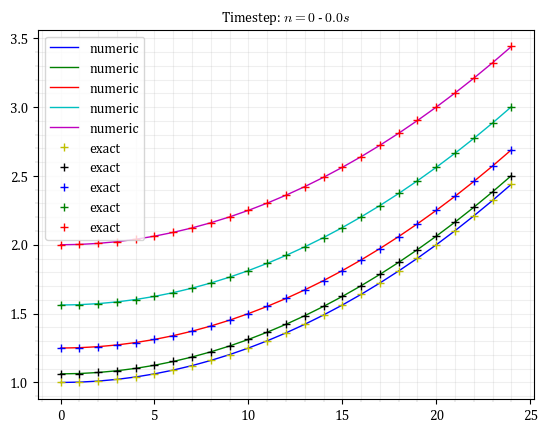

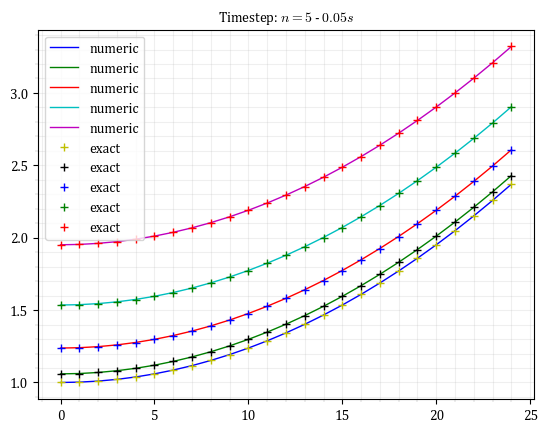

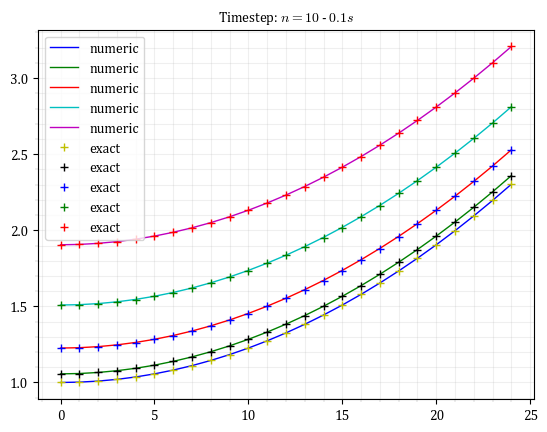

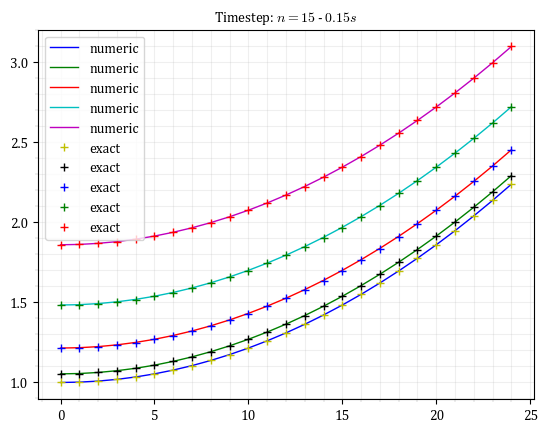

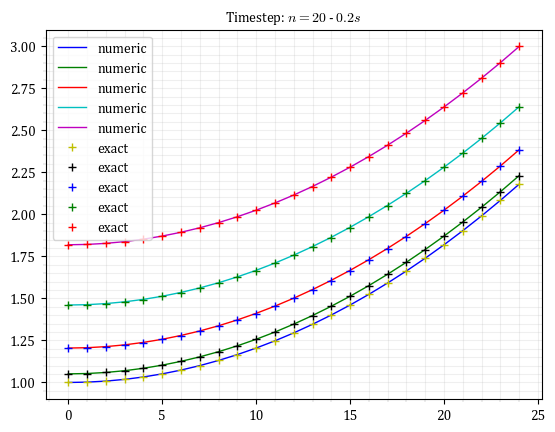

In [3]:
err = np.zeros( nt )
nxu = nx

for n in range( 0, nt, 5 ) :
    fig, ax1 = plt.subplots( 1, 1 );
    Uij = np.zeros( [ nxu, nxu] )
    Eij = np.zeros( [ nxu, nxu] )
    for i in range(0,nxu) : 
        for j in range(0,nxu) :
            Uij[i,j] = Unk[n,_(i,j)] 
            Eij[i,j] = EXACTnk[n,_(i,j)]   

    ax1.plot( Uij[::5,:].transpose(), label='numeric' )
    ax1.plot( Eij[::5,:].transpose(), marker='+', lw=0, label="exact" )
    ax1.set_title(f"Timestep: $n={n}$ - ${T[n]} s$")
    ax1.legend()


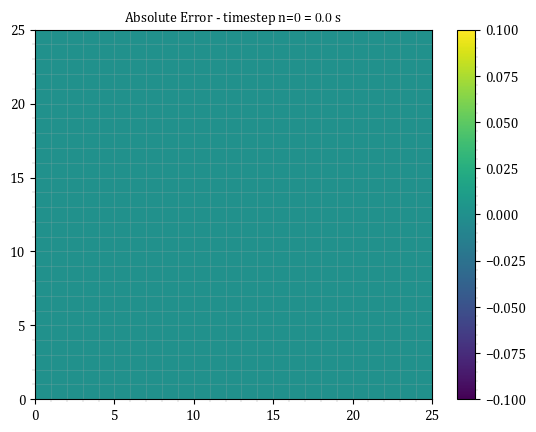

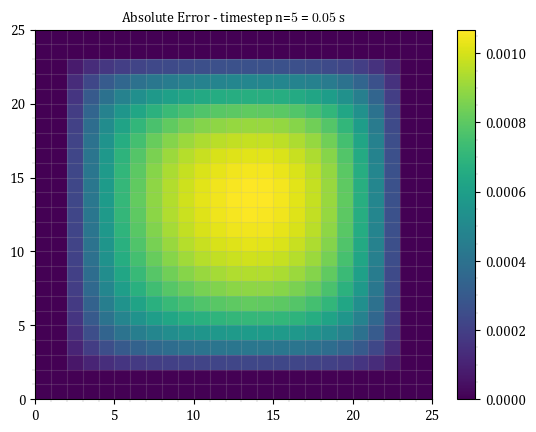

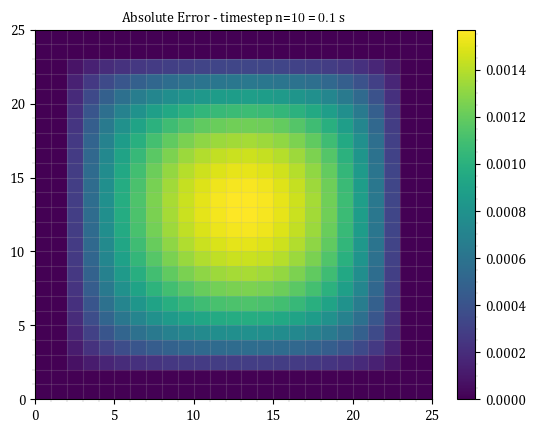

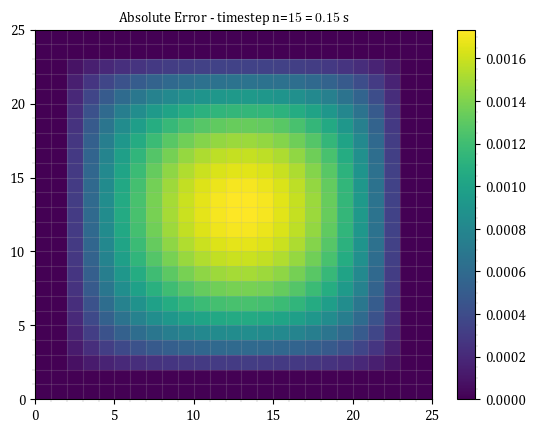

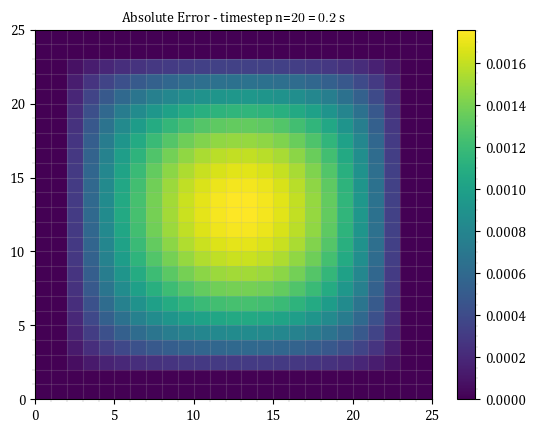

In [4]:
nxu = nx 
for n in range( 0, nt, 5 ) :
    fig, ax1 = plt.subplots( 1, 1);
    Uij = np.zeros( [ nxu, nxu] )
    Eij = np.zeros( [ nxu, nxu] )
    for i in range(0,nxu) : 
        for j in range(0,nxu) :
            Uij[i,j] = Unk[n,_(i,j)] 
            Eij[i,j] = EXACTnk[n,_(i,j)]   
    c = ax1.pcolormesh( Uij-Eij,cmap='viridis' )
    ax1.set_title(f"Absolute Error - timestep n=${n}$ = ${T[n]}$ s")
    fig.colorbar(c)


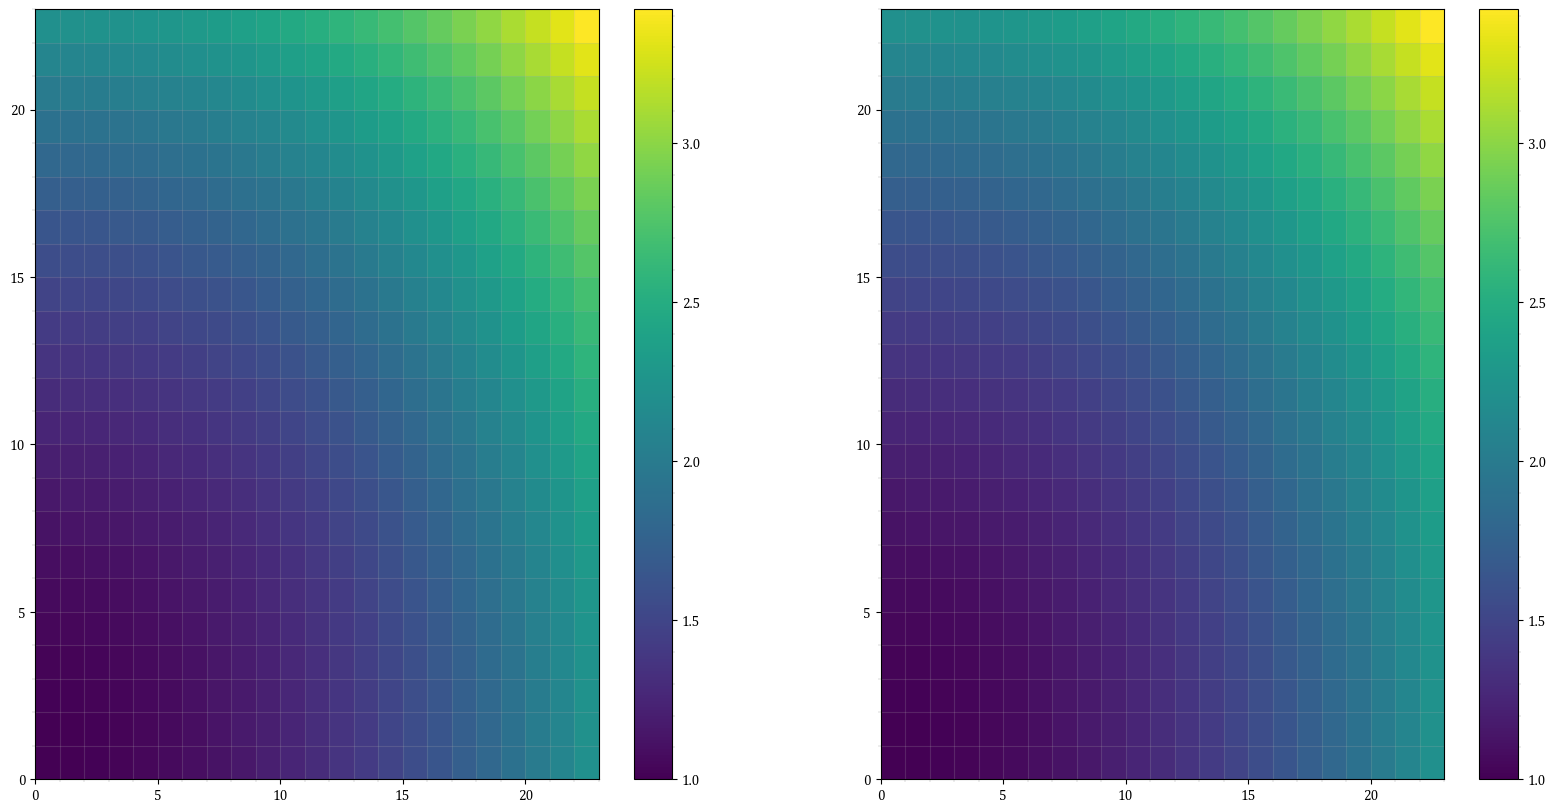

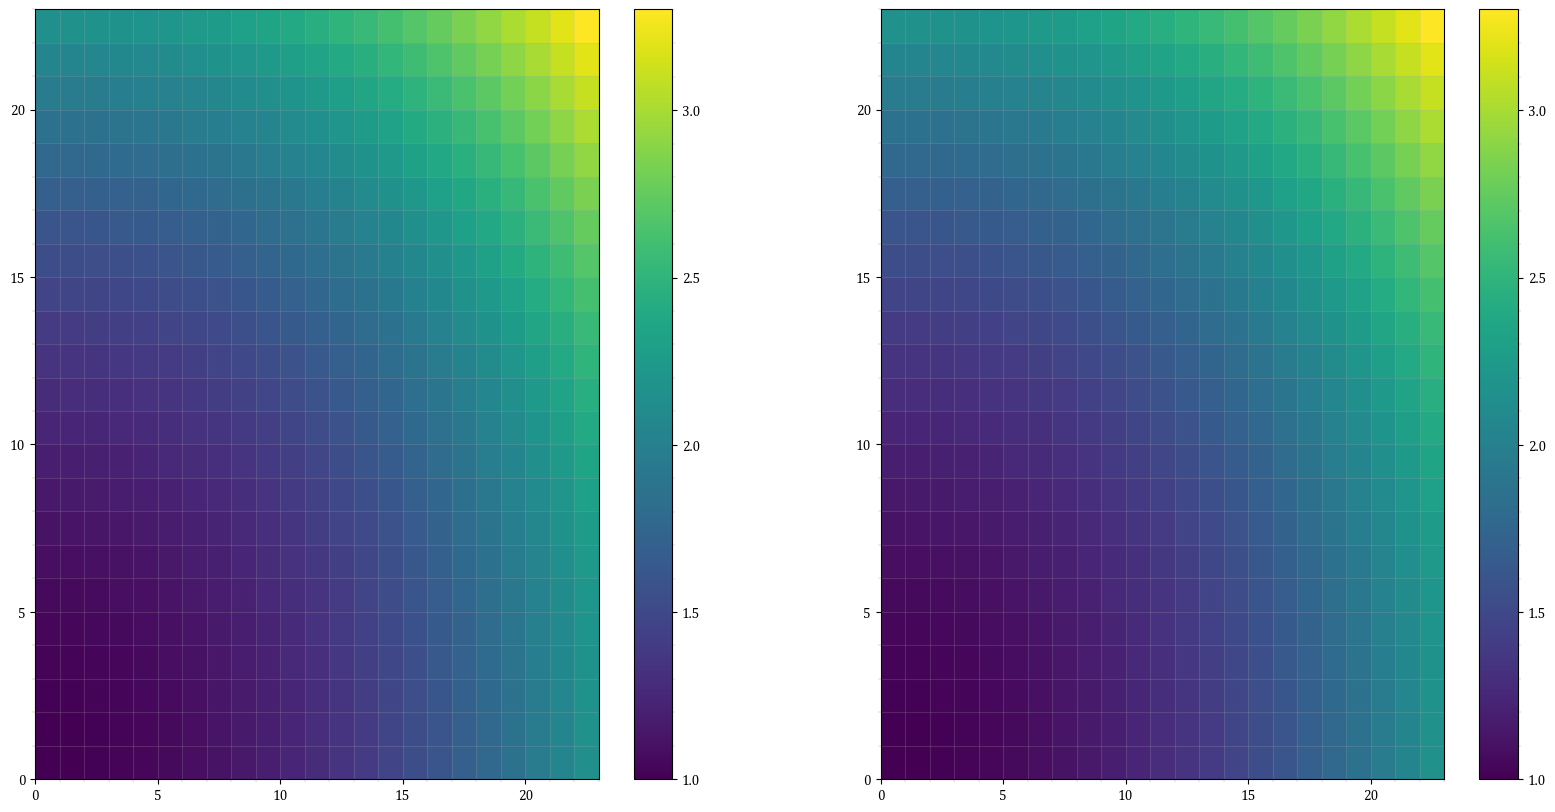

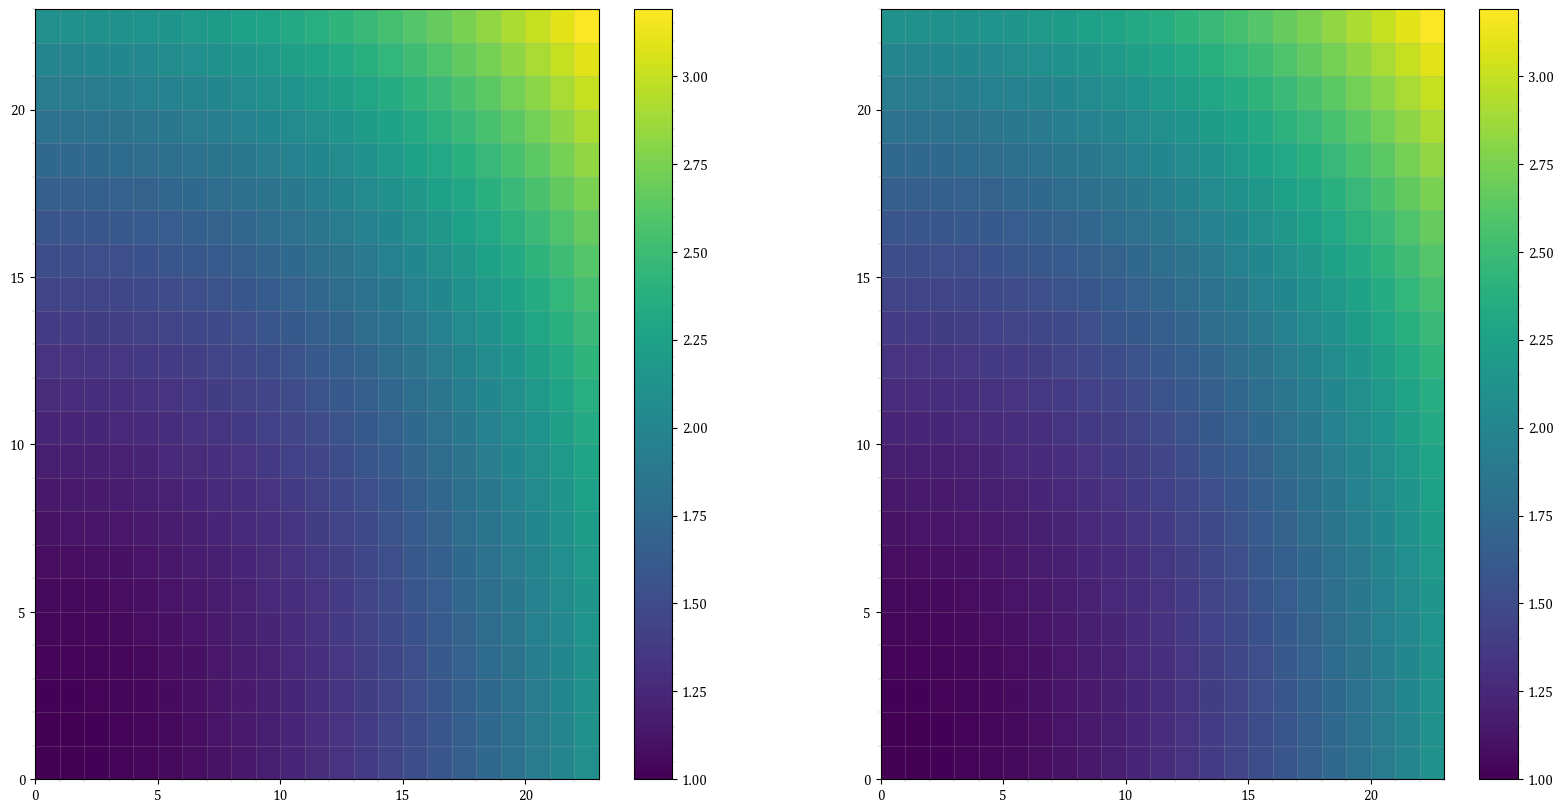

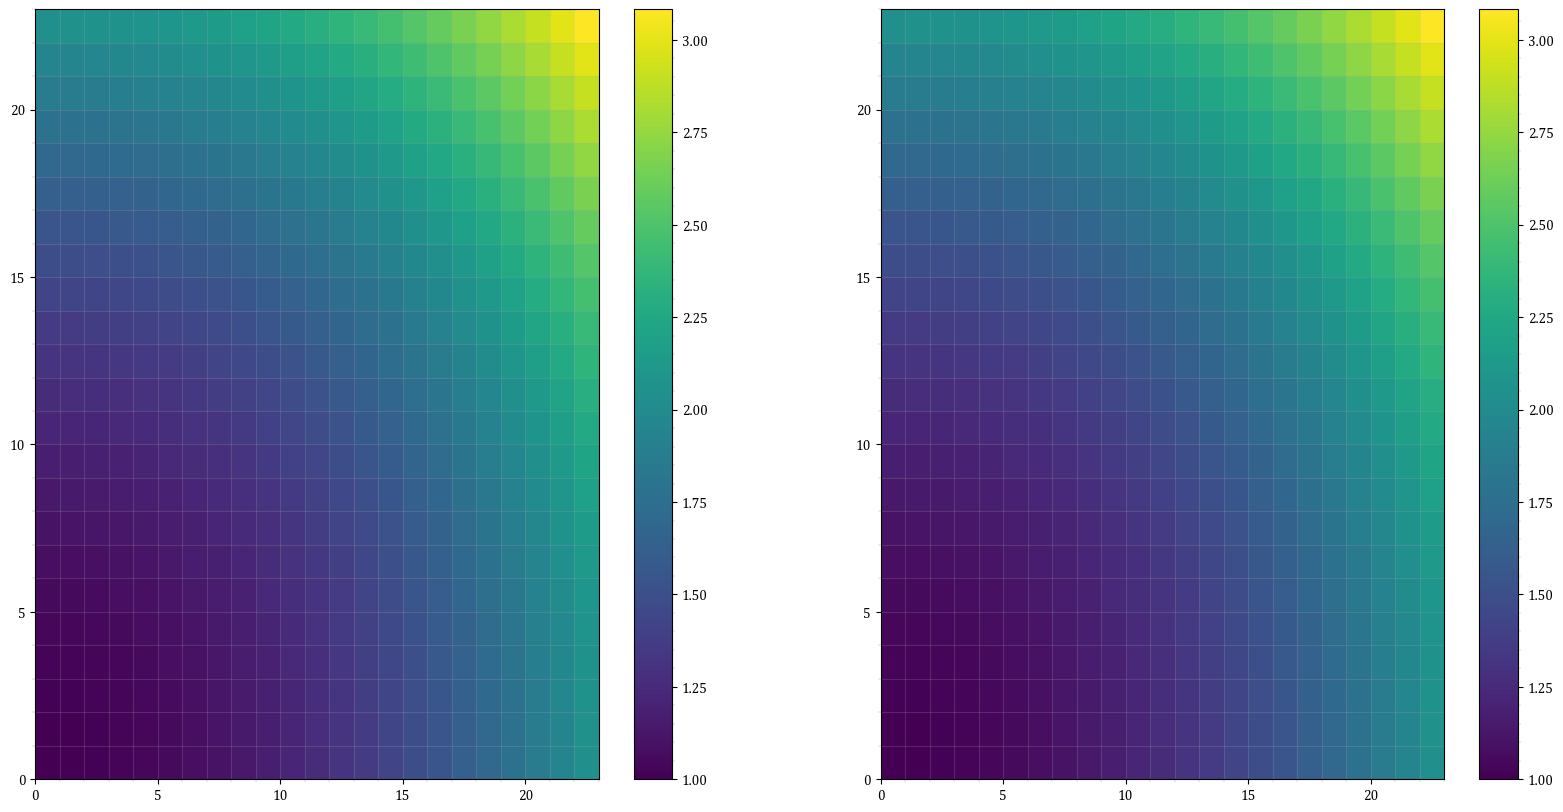

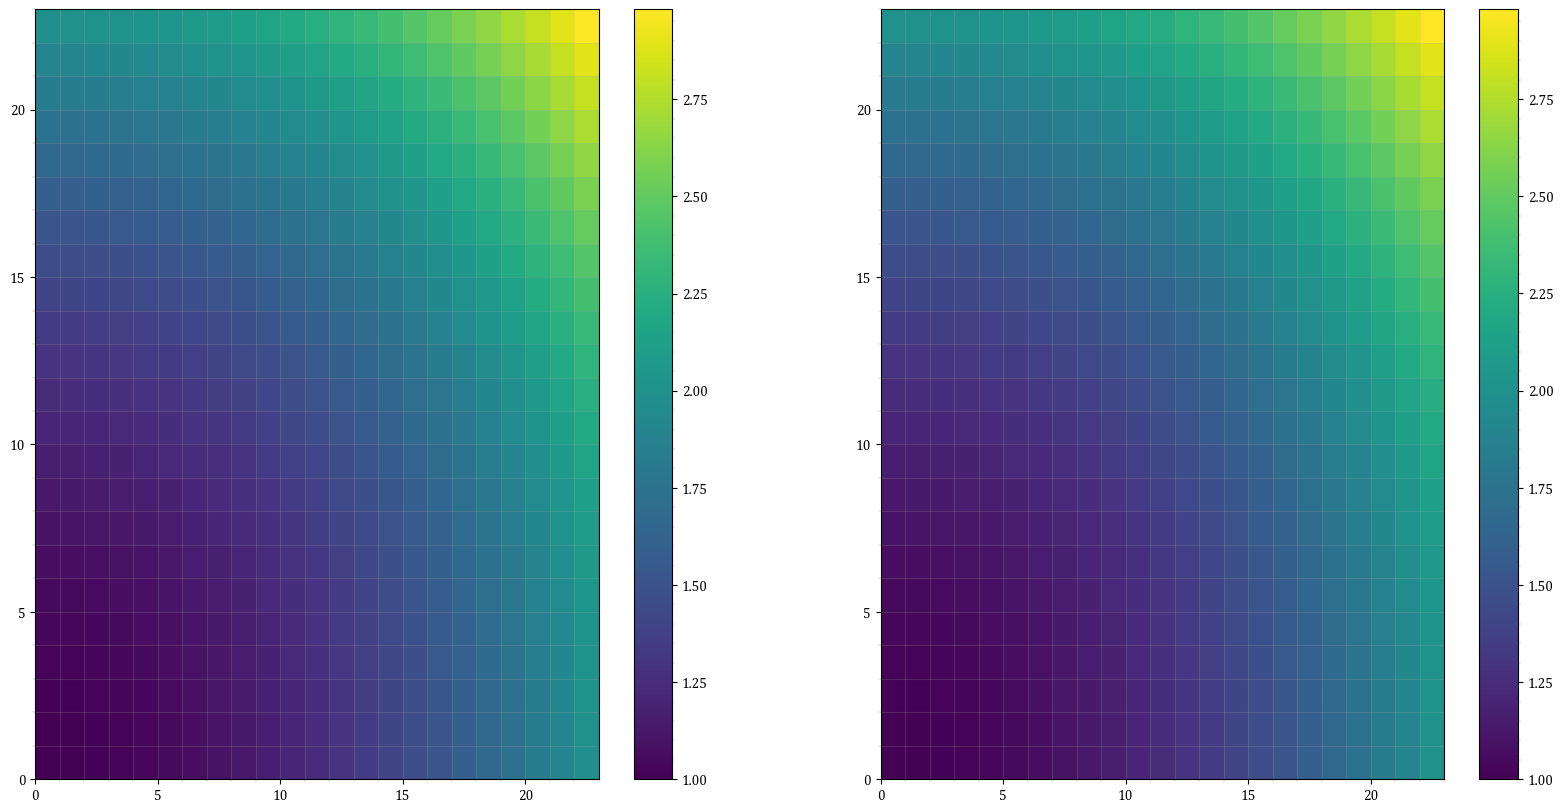

In [5]:
nxu = nx - 2
for n in range( 0, nt, 5 ) :
    fig, [ax1, ax2] = plt.subplots( 1, 2, figsize=[20,10] );
    Uij = np.zeros( [ nxu, nxu] )
    Eij = np.zeros( [ nxu, nxu] )
    for i in range(0,nxu) : 
        for j in range(0,nxu) :
            Uij[i,j] = Unk[n,_(i,j)] 
            Eij[i,j] = EXACTnk[n,_(i,j)]   
    c = ax1.pcolormesh( Uij,cmap='viridis' )
    fig.colorbar(c)
    c = ax2.pcolormesh( Eij, cmap='viridis' )
    fig.colorbar(c)